#**Data Upload**

In [83]:
from google.colab import files

uploaded = files. upload()

Saving happinesssurvey3.2.csv to happinesssurvey3.2 (3).csv
Saving happinesssurvey3.1.csv to happinesssurvey3.1 (2).csv
Saving happinesssurvey3.csv to happinesssurvey3 (2).csv
Saving happinesssurvey2.csv to happinesssurvey2 (3).csv
Saving happinesssurvey.csv to happinesssurvey (3).csv


In [135]:
from google.colab import files

uploaded = files. upload()

Saving train_features.csv to train_features.csv
Saving train_label.csv to train_label.csv


#**Logistic Regression Algorithm**

In [161]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

coefficients = lr_model.coef_[0]

feature_names = list(X.columns)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['AbsoluteCoefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

print("Feature Importance (sorted by coefficients):")
print(feature_importance_df)

y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)


Feature Importance (sorted by coefficients):
   Feature  Coefficient  AbsoluteCoefficient
0       X1     0.515456             0.515456
4       X5     0.185689             0.185689
6  Average     0.124422             0.124422
2       X3     0.109512             0.109512
5       X6     0.071923             0.071923
3       X4    -0.026647             0.026647
1       X2    -0.109400             0.109400
Prediction on training set: [0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1]


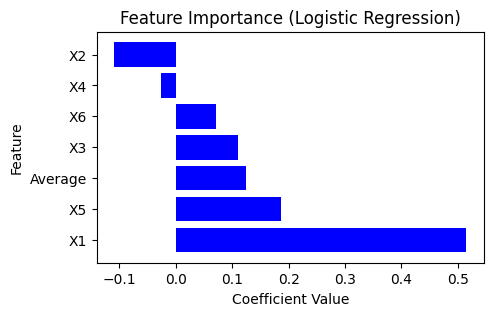

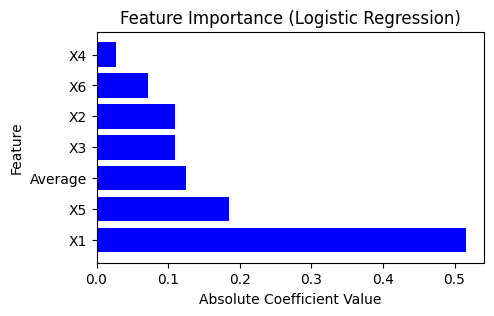

In [162]:
# plotting features by coefficients
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='b')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

#plotting features by absolute coefficients
feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False, inplace=True)
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['AbsoluteCoefficient'], color='b')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

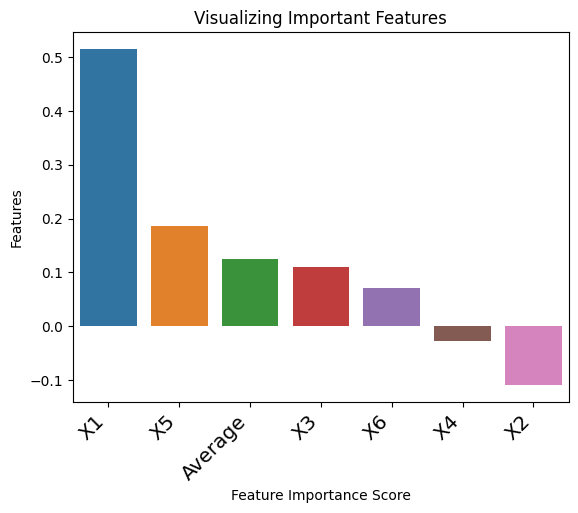

In [163]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": coefficients}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Add labels to your plot
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()


Accuracy: 0.5793650793650794
Precision:  0.5975609756097561
Recall:  0.7101449275362319


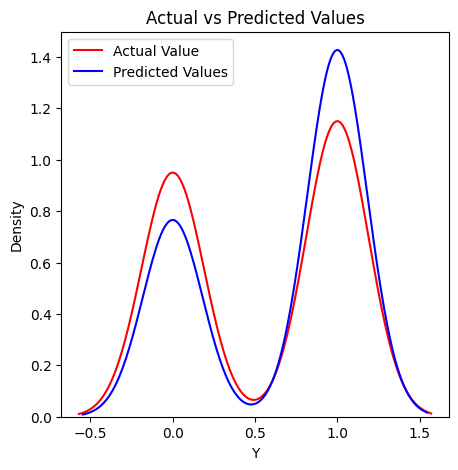

In [164]:
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision: ", precision_score(y, y_pred))
print("Recall: ", recall_score(y, y_pred))

# plot difference between actual and predicted values
plt.figure(figsize=(5, 5))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')

plt.legend()

plt.show()
plt.close()

#**Random Forest Classifier Algorithm**

##Finding Best Parameters

In [157]:
# import important packages
import numpy as np
import pandas as pd
import sklearn

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# data set
train_features = pd.read_csv("train_features.csv")
train_label = pd.read_csv("train_label.csv")

# list of all the parameters
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

# GridSearchCV model selection for cross-validation
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_features,train_label.values.ravel())

best_params = cv.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 2, 'n_estimators': 10}


### From: [Free Code Camp](https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/#:~:text=The%20random%20forest%20algorithm%20works%20by%20completing%20the,most%20voted%20prediction%20result%20as%20the%20final%20prediction.)


In [159]:
# packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


np.random.seed(42)  # ensures reproducibility in random number generation (42 is a common value)

# data set
data = pd.read_csv("happinesssurvey3.1.csv")

# split data into input and taget variable
X = data.drop(["Y"], axis=1)
y = data["Y"]

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.25, random_state=42
)

# create the classifier
classifier = RandomForestClassifier(n_estimators=10, max_depth=2)

# train the model
classifier.fit(X_train, y_train)

# prediction on the test set
y_pred = classifier.predict(X_test)

# calculate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

# check important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df


Accuracy: 0.75
Precision:  0.75
Recall:  0.8333333333333334


,feature,importance
6,Average,0.325048
4,X5,0.218057
2,X3,0.144563
5,X6,0.127761
3,X4,0.086716
1,X2,0.052998
0,X1,0.044858


### From: [Data Camp](https://www.datacamp.com/tutorial/random-forests-classifier-python)

#### Visualization from: [towards data science](https://towardsdatascience.com/random-forest-ca80e56224c1)

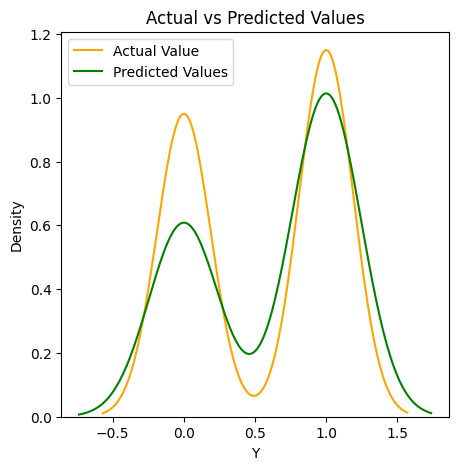

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plot difference between actual and predicted values
plt.figure(figsize=(5, 5))

ax = sns.distplot(y, hist=False, color="orange", label="Actual Value")
sns.distplot(y_pred, hist=False, color="green", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')

plt.legend()

plt.show()
plt.close()